## Simple Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income = pd.read_csv('../Data/income.csv')

In [3]:
from sklearn.model_selection import train_test_split

def income_model_data_prep(data):
    data = pd.get_dummies(
        income.assign(
                target = np.where(data["SalStat"]==" less than or equal to 50,000", 0,1),
                nativecountry = data["nativecountry"].str.replace(" Holand-Netherlands",
                                                         " Germany"),
                JobType = data["JobType"].replace({" Never-worked":" Without-pay"}),
                occupation = data["occupation"].str.replace(" Armed-Forces"," ?")
                ).drop("SalStat",axis=1),
        drop_first=True
    )
    X = data.drop(columns=["target"],axis=1)
    y = data["target"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = income_model_data_prep(income)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dt = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=None)

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
print(f'Train Accuracy: {dt.score(X_train, y_train)}')
print(f'Test Accuracy: {dt.score(X_test, y_test)}')

Train Accuracy: 0.9793995778281605
Test Accuracy: 0.8234834271419638


In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_test, dt.predict(X_test))

array([[4324,  528],
       [ 601,  943]])

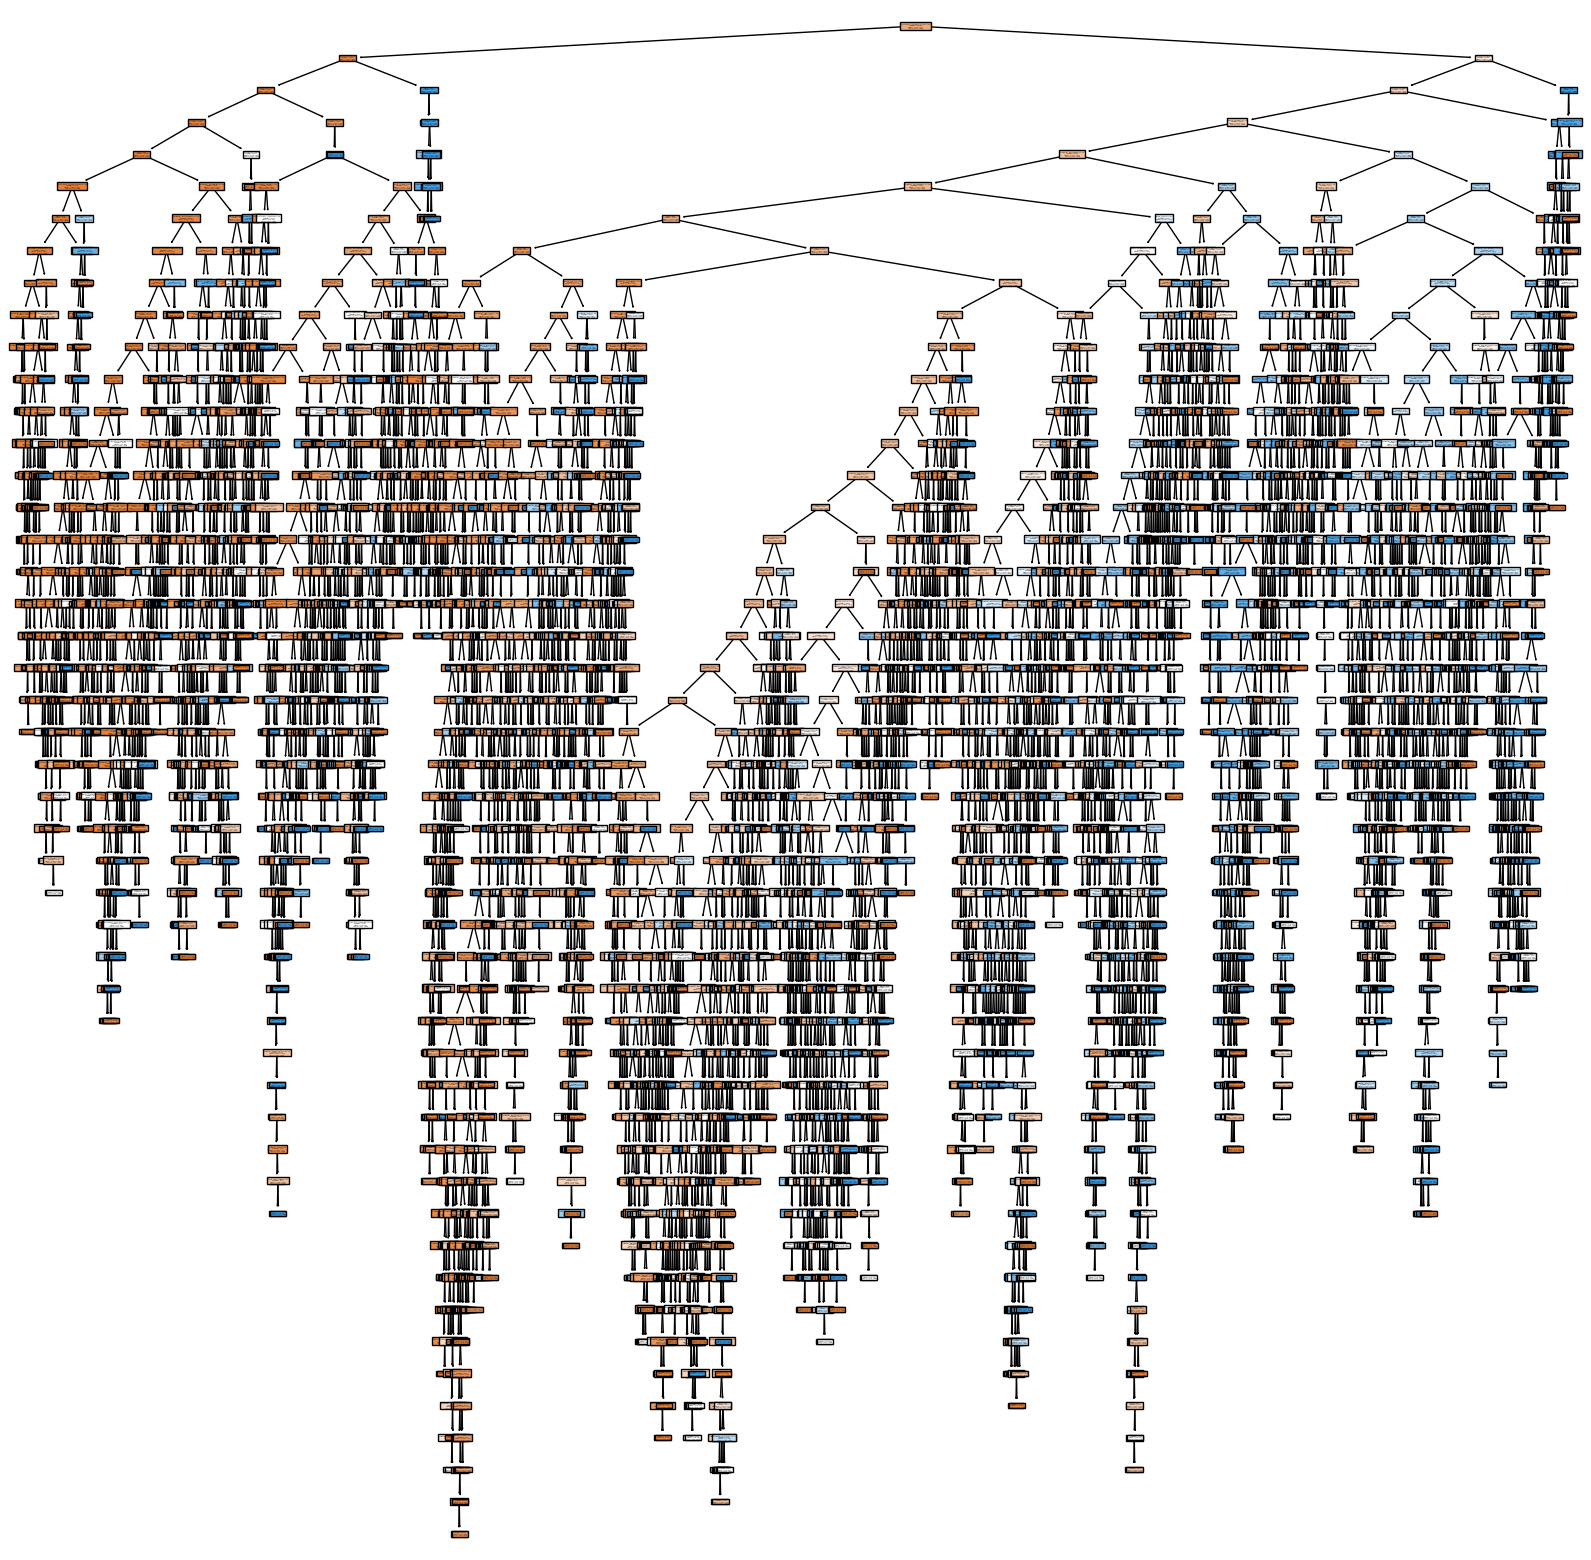

In [12]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,20))

plot_tree(
            dt,
            feature_names=list(X_test.columns),
            class_names=["Salary < 50K", "Salary > 50K"],
            impurity=False,
            proportion=True,
            filled=True
);

In [13]:
dt.feature_importances_

array([1.79114272e-01, 1.35035998e-01, 5.87422080e-02, 9.40843133e-02,
       8.08031225e-03, 9.17574607e-03, 1.40599051e-02, 7.54805578e-03,
       1.06020105e-02, 7.55264746e-03, 1.83473280e-04, 2.54835393e-03,
       1.95157881e-03, 3.29759176e-04, 1.28701745e-03, 2.88269002e-03,
       1.66400265e-03, 5.06856044e-03, 5.28409047e-03, 2.42456879e-02,
       4.29570453e-03, 1.04015165e-02, 8.95919546e-03, 0.00000000e+00,
       4.78975040e-03, 9.49755239e-03, 1.34424973e-03, 2.10616022e-01,
       7.76953713e-04, 4.14324952e-03, 1.91530877e-03, 1.61629047e-03,
       7.84113929e-03, 9.11025789e-03, 1.98807679e-02, 4.74636535e-03,
       2.89861276e-03, 5.24614585e-03, 4.91886103e-03, 4.95190640e-05,
       2.40030870e-02, 4.17410080e-03, 1.08227948e-02, 5.14688500e-03,
       5.14973464e-03, 3.93024616e-03, 1.41776887e-03, 2.03503517e-03,
       2.43133559e-03, 6.06011005e-03, 3.14796157e-03, 6.76174902e-03,
       4.67485990e-04, 7.44327100e-03, 8.46617610e-03, 9.85780088e-04,
      

In [21]:
importance_df = pd.DataFrame(
    {
    "feature": X_train.columns,
    "importance": dt.feature_importances_
    }
)

importance_df.sort_values(by="importance",ascending=False,inplace=True)

importance_df[importance_df['importance']>0]

,feature,importance
27,maritalstatus_ Married-civ-spouse,0.210616
0,age,0.179114
1,capitalgain,0.135036
3,hoursperweek,0.094084
2,capitalloss,0.058742
...,...,...
84,nativecountry_ Portugal,0.000107
77,nativecountry_ Laos,0.000069
39,occupation_ Priv-house-serv,0.000050
59,nativecountry_ Dominican-Republic,0.000046


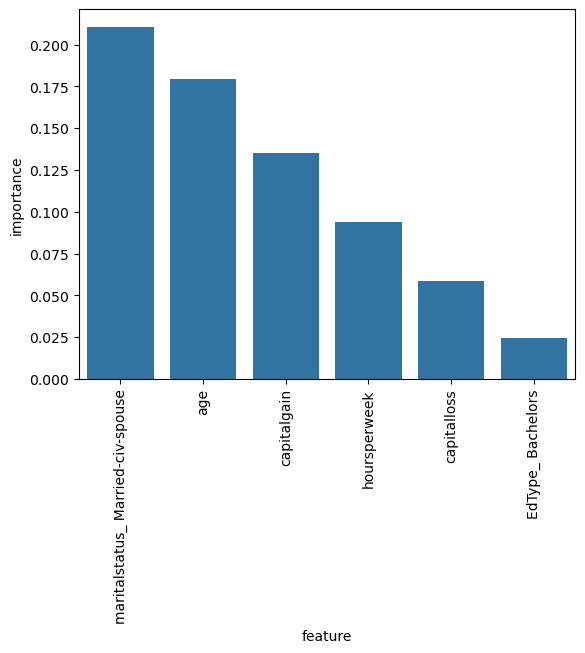

In [30]:
sns.barplot(importance_df[:6],x='feature',y='importance')
plt.xticks(rotation=90);
